In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [7]:
pushData = pd.read_csv('gestures_12bit/andreas/andreas_push.txt')
pullData = pd.read_csv('gestures_12bit/andreas/andreas_pull.txt')

In [8]:
data_pull = np.array(NormalizeData(pullData))
data_push = np.array(NormalizeData(pushData))

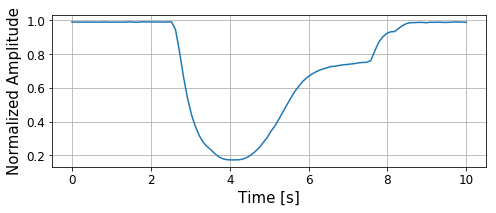

In [9]:
x = np.linspace(0, 10, 100)
plt.figure(figsize=(7,3))
plt.plot(x, data_pull[1500:1600])
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Normalized Amplitude', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.tight_layout()
plt.savefig('adc_pull.pdf')
plt.show()

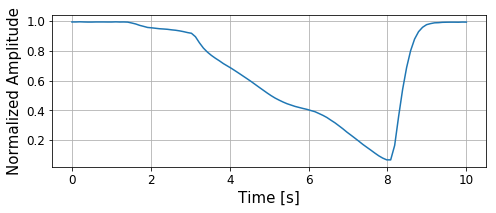

In [10]:
x = np.linspace(0, 10, 100)
plt.figure(figsize=(7,3))
plt.plot(x, data_push[1500:1600])
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Normalized Amplitude', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.tight_layout()
plt.savefig('adc_push.pdf')
plt.show()

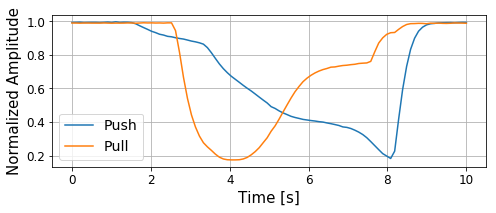

In [100]:
x = np.linspace(0, 10, 100)
plt.figure(figsize=(7,3))
plt.plot(x, data_push[1100:1200], label = 'Push')
plt.plot(x, data_pull[1500:1600], label = 'Pull')
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Normalized Amplitude', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(prop = {'size': 14})
plt.grid()
plt.tight_layout()
plt.show()

In [106]:
# Import fourbit data
fourbitData = pd.read_csv('fourbitPushPull.csv')
fourbitPush = fourbitData['Push']

fourbitPull = np.array(fourbitData['Pull'])
# Hacking
fourbitPull[0:5] = 15

fourbitTime = fourbitData['Time']

# Normalize data
data_fourbitPush = np.array(NormalizeData(fourbitPush[0:-8]))
data_fourbitPull = np.array(NormalizeData(fourbitPull[0:]))

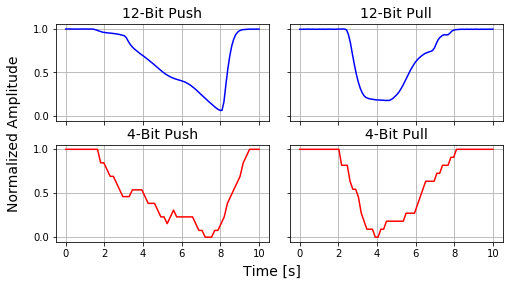

In [118]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,4))

# Analog data
axes[0,0].plot(x, data_push[1500:1600], color='blue')
#axes[0,0].set_xlim(([0.5,10])) # Wont work if sharing axis
axes[0,0].set_title('12-Bit Push', fontsize = 14)
axes[0,0].grid(True)

axes[0,1].plot(x, data_pull[1100:1200], color='blue')
axes[0,1].set_title('12-Bit Pull', fontsize = 14)
axes[0,1].grid(True)

# Fourbit data
times = np.linspace(0, x[-1], len(fourbitTime))
times_push = np.linspace(0, x[-1], len(data_fourbitPush))
axes[1,0].plot(times_push, data_fourbitPush, color='red')
axes[1,0].set_xlabel('')
axes[1,0].set_title('4-Bit Push', fontsize = 14)
axes[1,0].grid(True)

times_pull = np.linspace(0, x[-1], len(data_fourbitPull))
axes[1,1].plot(times_pull, data_fourbitPull, color='red')
axes[1,1].set_xlabel('')
axes[1,1].set_title('4-Bit Pull', fontsize = 14)
axes[1,1].grid(True)

fig.text(0.5, 0.02, 'Time [s]', ha='center', va='center', fontsize=14)                                                                                                            
fig.text(0.04, 0.5, 'Normalized Amplitude', va='center', rotation='vertical', fontsize=14)                                                                                                            
#fig.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.25)
#axes[0,0].set_ylabel("Voltage [V]", fontsize = 13)
plt.savefig('pushpullGestures.pdf')

In [32]:
print(len(data_fourbitPush))

70
